In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Top Level Data Analysis

### Snapshot of the Data Table

In [209]:
statuses_furthest = pd.read_csv("./status_times_furthest_condensed.csv", sep='|')
df = pd.DataFrame(statuses_furthest, index=None)
df.head()

,Story,Ship Date,0. On deck for Brendan,1. Verify Story Need,2. Verify Story Structure,3. Design Story,4. Review Story Design,5. Add Top Stories To Estimate Time of Story Week,6. Estimate Time of Story,7. Verify & Add Top Bugs,8. Start This Week (Next up),9. Finish This Week (In Progress),10. Code Review,11. QA Review,12. PO Verify (Test UX & Push),13. Complete! (On Live)
0,Amount Raised Goal by embed,2020-06-15,36.15,0,0,0,5.333333,0.0,168.35,0.000000,0.000000,178.766667,24.133333,3.066667,75.100000,0
1,Content-only Block Email Bug,2020-06-16,0.00,0,0,0,0.000000,0.0,0.00,0.816667,4.233333,0.000000,0.316667,0.000000,3.600000,0
2,Browser Load Testing - Calibre integration,2020-06-15,0.00,0,0,0,0.000000,0.0,0.00,0.000000,161.750000,166.683333,4.450000,0.000000,0.000000,0
3,Regular People Data Alloy Integration,2020-06-15,0.00,0,0,0,0.000000,0.0,0.00,0.000000,17.566667,71.350000,0.000000,0.000000,0.000000,0
4,No Blocks page fails with only deleted blocks,2020-06-12,0.00,0,0,0,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.216667,0.400000,45.783333,0


In [210]:
cols = list(df.columns)
cols = cols[2:]

### Line Plot with all Stories

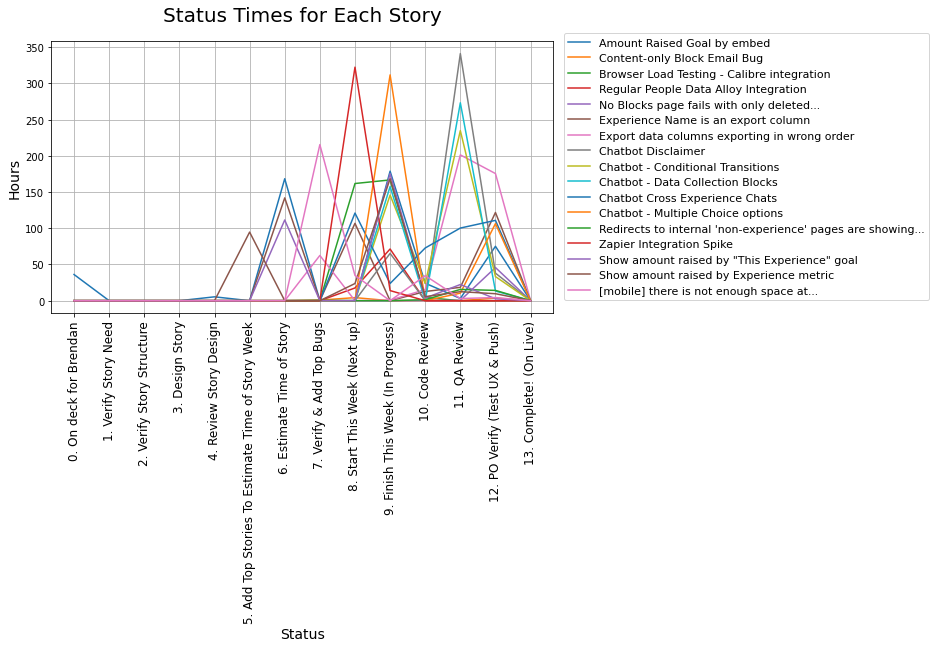

In [211]:
#Line Plot showing all stories in one graph
#X axis -> status
#Y axis -> hours

rows, columns = df.shape
plots = []
stories = []
plt.figure(figsize=(9,5))
for i in range(0, rows):
    values = list(df.iloc[i].values)
    s = ""
    if len(values[0].split()) > 7:
        s = "..."
    story = " ".join(values[0].split()[:7])+s
    stories.append(story)
    hours = values[2:]
    plot, = plt.plot(cols, hours, label=story)
    plots.append(plot,)
plt.xticks(rotation='vertical', fontsize=12)
plt.title('Status Times for Each Story', fontsize=20, pad=20)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Status', fontsize=14)
plt.legend(plots, stories, bbox_to_anchor=(1.01, 1.05), prop={'size': 11})
plt.grid()

In [212]:
colors = {}
for plot, story in zip(plots, stories):
    colors[story] = plot.get_color()

### Individual Line Plots

In [213]:
#One line plot for each story
#X axis repeates and is only the status number

In [214]:
col_nums = []
for col in cols:
    col_nums.append(col.split(".")[0])

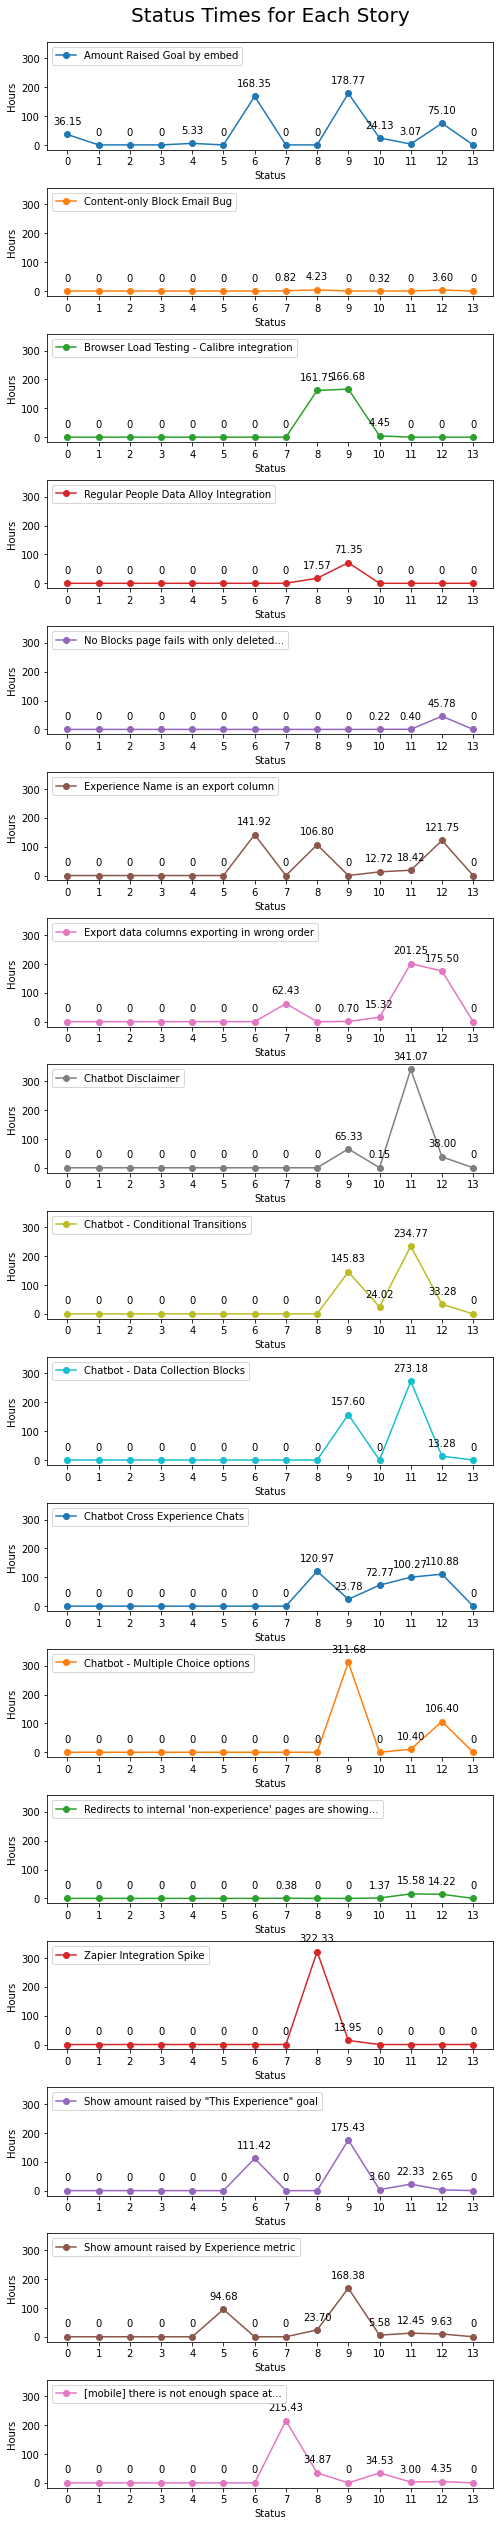

In [215]:
rows, columns = df.shape
fig, axs = plt.subplots(rows, sharey=True)
for i in range(0, rows):
    values = list(df.iloc[i].values)
    s = ""
    if len(values[0].split()) > 7:
        s = "..."
    story = " ".join(values[0].split()[:7])+s
    hours = values[2:]
    
    
    for x,y in zip(col_nums,hours):
        label = "{:.2f}".format(y)
        if label == "0.00":
            label = "0"
        axs[i].annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center')
    
    axs[i].set_xlabel("Status")
    axs[i].set_ylabel("Hours")
    if i==0:
        axs[i].set_title('Status Times for Each Story', fontsize=20, pad=20)
        
    plot, = axs[i].plot(col_nums, hours, label=story, color=colors[story], marker="o")
    axs[i].legend([plot,], [story], loc="upper left")
    
fig.set_size_inches(8, 45)
fig.subplots_adjust(hspace=0.35)

### Stacked Bar Graph with Total Status Times

In [216]:
#X axis is status, y axis is hours
#Each bar has total hours in each status, divided by story
#Legend for story color coded

In [217]:
status_totals = {}
for col in cols:
    status_totals[col] = df[col].sum()

Text(0, 440, 'Total Hours:\n0: 36.15\n1: 0.00\n2: 0.00\n3: 0.00\n4: 5.33\n5: 94.68\n6: 421.68\n7: 279.07\n8: 792.22\n9: 1479.50\n10: 199.17\n11: 1236.18\n12: 754.43\n13: 0.00')

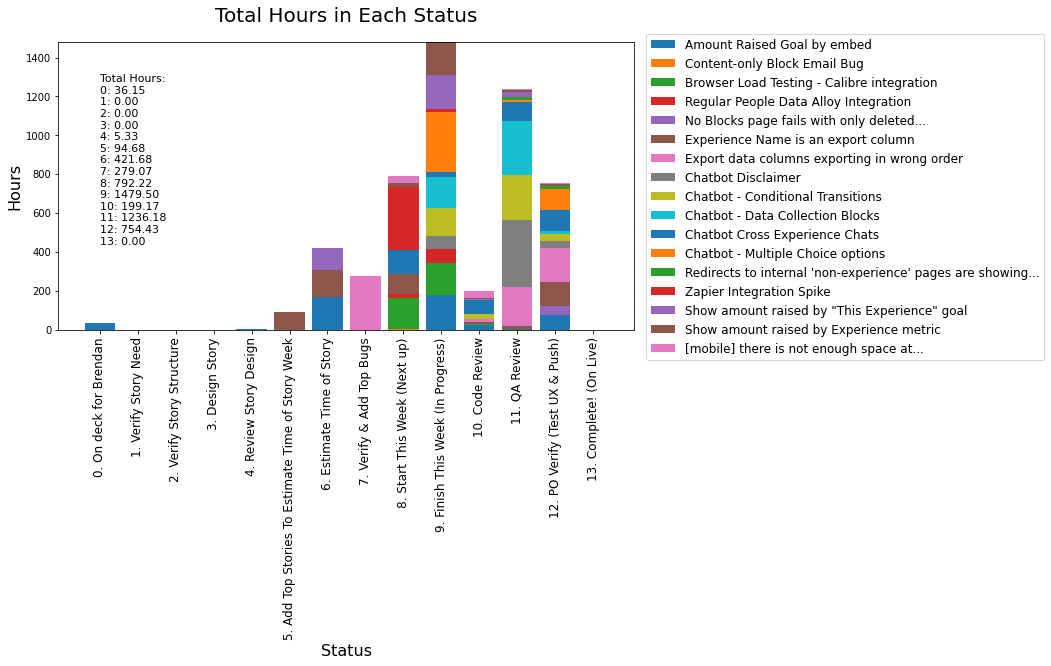

In [223]:
new_df = df.drop(columns=['Story','Ship Date'])
data = np.array(new_df.values)
color_list = list(colors.values())
stories = []

for i in range(0, rows):
    values = list(df.iloc[i].values)
    s = ""
    if len(values[0].split()) > 7:
        s = "..."
    story = " ".join(values[0].split()[:7])+s
    stories.append(story)

fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0,0,1,1])

X = np.arange(data.shape[1])
for i in range(data.shape[0]):
    ax.bar(X, data[i], bottom = np.sum(data[:i], axis = 0), color=color_list[i], label=stories[i])

ax.set_xticks(list(range(len(cols))))
ax.set_xticklabels(cols)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(12) 

ax.set_xlabel('Status')
ax.xaxis.label.set_size(16)
ax.set_ylabel('Hours')
ax.yaxis.label.set_size(16)
ax.set_title('Total Hours in Each Status', fontsize=20, pad=20)
plt.legend(stories, bbox_to_anchor=(1.01, 1.05), prop={'size': 12})

s = "Total Hours:"
count=0
for value in status_totals.values():
    s = s+"\n"+str(count)+": "+"{:.2f}".format(value)
    count+=1
ax.text(0, 440, s, fontsize=11)

## Time Analysis Using Ship Date

### Line Plot Showing Change Over Time

#### Rainbow Coloring (Most recent = Purple, Least recent = Red)

In [181]:
df = df.sort_values(by='Ship Date', ascending=False)

In [182]:
import matplotlib.cm as cm

In [187]:
rows, columns = df.shape
plots = []
stories = []
colors = cm.rainbow(np.linspace(0, 1, rows))

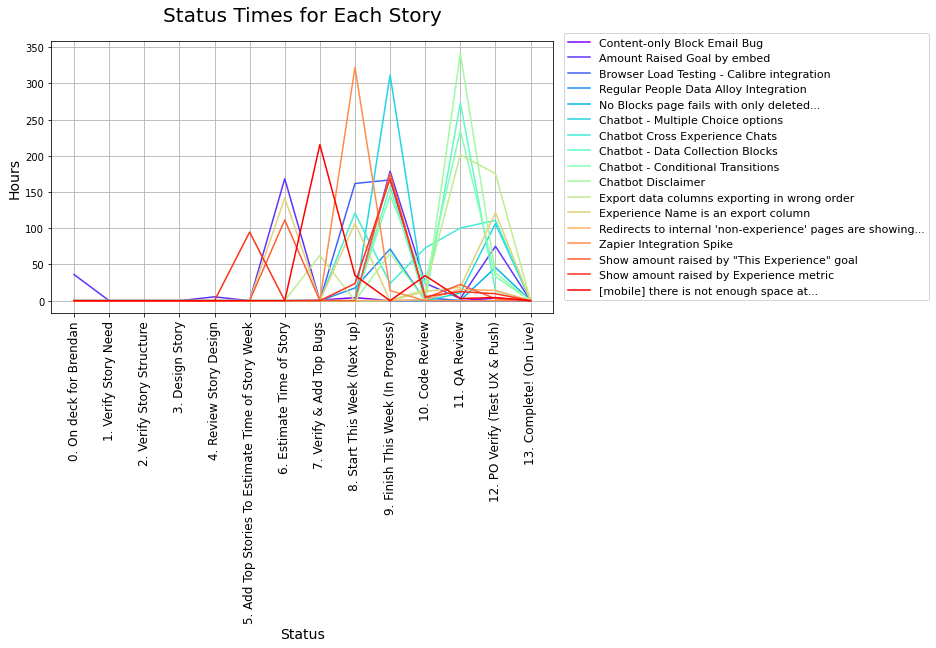

In [188]:
plt.figure(figsize=(9,5))
for i in range(0, rows):
    values = list(df.iloc[i].values)
    s = ""
    if len(values[0].split()) > 7:
        s = "..."
    story = " ".join(values[0].split()[:7])+s
    stories.append(story)
    hours = values[2:]
    plot, = plt.plot(cols, hours, label=story, color = colors[i])
    plots.append(plot,)
plt.xticks(rotation='vertical', fontsize=12)
plt.title('Status Times for Each Story', fontsize=20, pad=20)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Status', fontsize=14)
plt.legend(plots, stories, bbox_to_anchor=(1.01, 1.05), prop={'size': 11})
plt.grid()

### Series of Scatter Plots to Show Time on Ship Date

In [189]:
#14 scatter plots
#Each scatter plot should have one status regressed on ship date
#Includes line of best fit and r squared

#### Snapshot of New Table Uncondensed

In [190]:
statuses_furthest_uncondensed = pd.read_csv("./status_times_furthest.csv", sep='|', names = ["Story", "Status", "Hours", "Ship Date"])
new_df = pd.DataFrame(statuses_furthest_uncondensed, index=None)
new_df.head()

,Story,Status,Hours,Ship Date
0,Amount Raised Goal by embed,0. On deck for Brendan,36.150000,2020-06-15
1,Amount Raised Goal by embed,1. Verify Story Need,0.000000,2020-06-15
2,Amount Raised Goal by embed,2. Verify Story Structure,0.000000,2020-06-15
3,Amount Raised Goal by embed,3. Design Story,0.000000,2020-06-15
4,Amount Raised Goal by embed,4. Review Story Design,5.333333,2020-06-15


#### Hours on Ship Date for Each Status

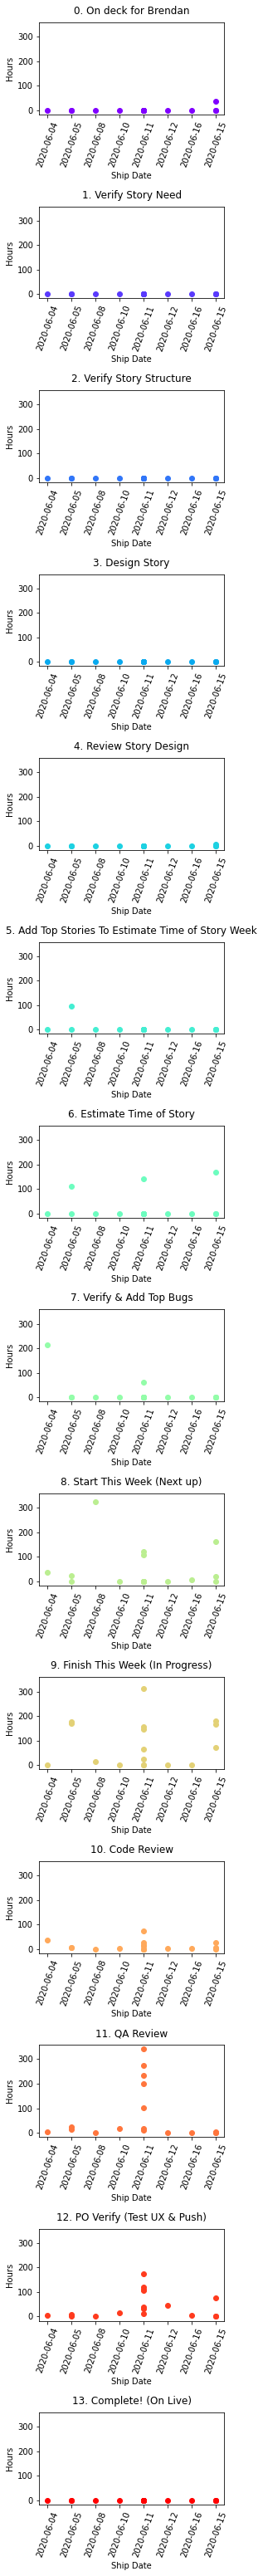

In [191]:
colors = cm.rainbow(np.linspace(0, 1, 14))
fig, axs = plt.subplots(14, sharey=True)
# fig, axs = plt.subplots(14)
for i in range(0, 14):
    data = new_df[new_df['Status']==cols[i]]
    axs[i].set_xlabel("Ship Date")
    axs[i].set_ylabel("Hours")
    axs[i].set_title(cols[i], pad=10)
#     ymax = max(data['Hours'])*1.1
#     if ymax==0:
#         ymax=5
#     axs[i].set_ylim(bottom=0, top=ymax)
    plot = axs[i].scatter(data['Ship Date'], data['Hours'], color=colors[i])
    axs[i].invert_xaxis()
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(70)
fig.subplots_adjust(hspace=1)
fig.set_size_inches(4, 55)
